# Project: Investigate a Dataset - [TMDb movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project we will be analyzing data associated with ***movies industry*** , and in particular we will be interested in finding the most impotant factors that can affect the ***success*** or ***failure*** of a movie before it's release.We also will go through the trends of different features of movies like the relation between the ***genre*** of the movie and the ***cast*** and other features we have in our dataset.

>This dataset consists of 10866 rows and 21 columns.
these columns consists of:
1. **id**
2. **imdb_id** : A unique identifier for each movie.
3. **popularity** : A number indicating how popular this movie is among fans.
4. **budget** : The amount of money spent on producing the movie.
5. **revenue** : The income which the movie had achieved after being released.
6. **original_title** : The title that was given to the movie in the language of the movie home country.
7. **cast** : Names of top actors/actresses in the movie.
8. **homepage** : A link to the movie home page.
9. **director** : Name of the movie director.
10. **tagline** : A short phrase that was mentioned in the movie by one of the actors and gives an idea about the movie experience the viewer will have
11. **keywords** : some words that illustrates an image about the story of the movie and different aspects of it.
12. **overview** : A brief introduction to the movie.
13. **runtime** : The length of the movie.
14. **genres** : Type of the movie [action , adventure , drama ...etc]
15. **production_companies** : The responsible company for producing and funding the movie.
16. **release_date**
17. **vote_count** : number of voters for the movie
18. **vote_average** : Average of total votes the movie recieved
19. **release_year** : the year in which movie was released in cinemas
20. **budget_adj** : the budget in terms of 2010 dollars, accounting for inflation over time.
21. **revenue_adj** : the revenue in terms of 2010 dollars, accounting for inflation over time.
***
### Question(s) for Analysis
>1. Is the name of the director associated with the popularity of the movie?
2. Is the popularity of a director associated with the movie revenue?
3. what is the correlation between budget and revenue?

In [1]:
#importing libraries that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To make our plots appear in the notebook we use the next line
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# Loading the file containing our dataset
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")


In [3]:
#The first five rows of the data
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [4]:
#the number of rows and columns
df.shape

(10866, 21)

In [5]:
#Info about the type and number of non-null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

1. there are multiple columns with null values but a column like homepage has alot of null values and this column is not important in our analysis so we will drop that column other columns we need so we will drop the rows with null values instead.
2. we also notice that the release_date is of type string instead of datetime so we will change that

In [6]:
#The number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
#Useful descriptive statistics for each column of data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [8]:
#check for sum of duplicated rows
sum(df.duplicated())

1

Our data seems to have one duplicated row


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

We will remove the duplicated row in the cell below

In [9]:
df.drop_duplicates(inplace = True)

In the cell bellow we will drop the columns we are not going to use in our analysis

In [10]:
df.drop(["homepage","tagline","keywords","id","imdb_id","original_title","overview","release_year"],inplace = True,axis = 1)

In [11]:
df.head()

popularity     budget     revenue  \
0   32.985763  150000000  1513528810   
1   28.419936  150000000   378436354   
2   13.112507  110000000   295238201   
3   11.173104  200000000  2068178225   
4    9.335014  190000000  1506249360   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average    budget_adj   revenue_adj  
0           6.5  1.379999e+08  1.392446e+09  
1           7.1  1.379999e+08  3.481613e+08  
2           6.3  1.012000e+08  2.716190e+08  
3           7.5  1.839999e+08  1.902723e+09  
4           7.3  1.747999e+08  1.385749e+09

In [12]:
#number of rows with missing data in our dataframe
df.shape[0]- df.dropna().shape[0]

1093

Now we will drop these rows with null values

In [13]:
df.dropna(inplace = True)

make sure we have no null values

In [14]:
df.shape[0]- df.dropna().shape[0]

0

Here we will change the datatype of the dates we have from string to datetime

In [15]:
df['release_date'] = pd.to_datetime(df["release_date"])

In [16]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 1.0+ MB
(9772, 13)


In [17]:
df.head()

popularity     budget     revenue  \
0   32.985763  150000000  1513528810   
1   28.419936  150000000   378436354   
2   13.112507  110000000   295238201   
3   11.173104  200000000  2068178225   
4    9.335014  190000000  1506249360   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average    budget_adj   revenue_adj  
0           6.5  1.379999e+08  1.392446e+09  
1           7.1  1.379999e+08  3.481613e+08  
2           6.3  1.012000e+08  2.716190e+08  
3           7.5  1.839999e+08  1.902723e+09  
4           7.3  1.747999e+08  1.385749e+09

check descriptive statistics in the cleaned dataset

In [18]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  9772.000000  9.772000e+03  9.772000e+03  9772.000000  9772.000000   
mean      0.694721  1.617967e+07  4.423121e+07   102.926627   239.312014   
std       1.036931  3.221074e+07  1.225889e+08    27.877432   603.011504   
min       0.000188  0.000000e+00  0.000000e+00     0.000000    10.000000   
25%       0.232710  0.000000e+00  0.000000e+00    90.000000    18.000000   
50%       0.419762  2.000000e+05  0.000000e+00   100.000000    46.000000   
75%       0.776408  1.928750e+07  3.104729e+07   112.000000   173.000000   
max      32.985763  4.250000e+08  2.781506e+09   877.000000  9767.000000   

       vote_average    budget_adj   revenue_adj  
count   9772.000000  9.772000e+03  9.772000e+03  
mean       5.963528  1.941599e+07  5.705309e+07  
std        0.913174  3.566634e+07  1.514499e+08  
min        1.500000  0.000000e+00  0.000000e+00  
25%        5.400000  0.000000e+00  0.000000e+00  
50%        6.000000  3.061342e+05  0.000000e+00  
75%        6.600000  2.464268e+07  4.311848e+07  
max        8.700000  4.250000e+08  2.827124e+09

In [19]:
(df['budget'] == 0).sum()

4751

In [20]:
(df['revenue'] == 0).sum()

5022

We notice that there are alot of zero values in budget and revenue columns ,which means (according to kaggle) that these values are missing

In the next cell we wull replace these values with the median 

In [21]:

df['budget']=df['budget'].replace(0,df['budget'].median())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].median())


Since the median of the revenue columns is zero we will replace it with the mean 

In [22]:
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

Make sure there are no zero values in the 4 columns of : budget , revenue , budjet_adj , revenue_adj

In [23]:
(df['budget'] == 0).sum()

0

In [24]:
(df['revenue'] == 0).sum()

0

In [25]:
(df['budget_adj'] == 0).sum()

0

In [26]:
(df['revenue_adj'] == 0).sum()

0

runtime column has some zero values too 

In [27]:
(df['runtime'] == 0).sum()

13

we will replace it with the median

In [28]:
df['runtime'] = df['runtime'].replace(0,df['runtime'].median())

In [29]:
df.head()

popularity     budget       revenue  \
0   32.985763  150000000  1.513529e+09   
1   28.419936  150000000  3.784364e+08   
2   13.112507  110000000  2.952382e+08   
3   11.173104  200000000  2.068178e+09   
4    9.335014  190000000  1.506249e+09   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average    budget_adj   revenue_adj  
0           6.5  1.379999e+08  1.392446e+09  
1           7.1  1.379999e+08  3.481613e+08  
2           6.3  1.012000e+08  2.716190e+08  
3           7.5  1.839999e+08  1.902723e+09  
4           7.3  1.747999e+08  1.385749e+09

In [30]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  9772.000000  9.772000e+03  9.772000e+03  9772.000000  9772.000000   
mean      0.694721  1.627690e+07  6.696239e+07   103.059660   239.312014   
std       1.036931  3.216201e+07  1.162142e+08    27.623361   603.011504   
min       0.000188  1.000000e+00  2.000000e+00     3.000000    10.000000   
25%       0.232710  2.000000e+05  3.526309e+07    91.000000    18.000000   
50%       0.419762  2.000000e+05  4.423121e+07   100.000000    46.000000   
75%       0.776408  1.928750e+07  4.423121e+07   112.000000   173.000000   
max      32.985763  4.250000e+08  2.781506e+09   877.000000  9767.000000   

       vote_average    budget_adj   revenue_adj  
count   9772.000000  9.772000e+03  9.772000e+03  
mean       5.963528  1.956483e+07  8.637367e+07  
std        0.913174  3.558554e+07  1.428436e+08  
min        1.500000  9.210911e-01  2.370705e+00  
25%        5.400000  3.061342e+05  4.908911e+07  
50%        6.000000  3.087798e+05  5.705309e+07  
75%        6.600000  2.464268e+07  5.705309e+07  
max        8.700000  4.250000e+08  2.827124e+09

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null float64
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (who are the top 10 directors that have the most popularity?)

In [32]:
#function for labeling the plot
def labeling(title,x,y):
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y);

In [33]:
#group the popularity mean by director name
dir_series = df.groupby('director').popularity.mean()

In [34]:
dir_series.sort_values(ascending =False,inplace = True)

Here we will have the top 10 directors that have the most populariy amnog fans

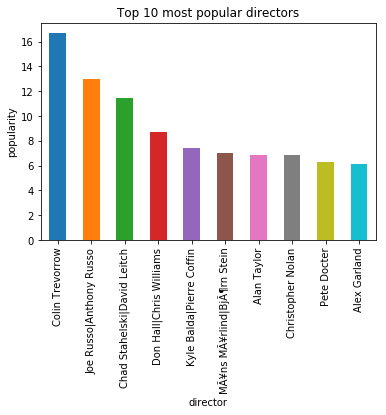

In [35]:
top_10_dir = dir_series[:10]
top_10_dir.plot( kind  = 'bar' )
labeling('Top 10 most popular directors','director','popularity')

### Research Question 2 (Is the popularity of a director associated with the movie revenue?)

Here I will try to sort the dataframe based on the sorted data series of directors I obtained above(dir_series)

In [36]:
#mapping the dir_series to numbers from 1 to len(dir_series)

In [37]:
#length of ranked directors based on their popularity
dir_series = dir_series.index
s_len  = len(dir_series)

In [38]:
#1 for highest popularity
dir_popularity_rank = np.arange(1,s_len+1)


In [39]:
#create a dictionary with director names as keys and ranks as values
director_ranks_dict = dict(zip(dir_series, dir_popularity_rank))



Now we will create a new column in our dataframe for the new ranks we have

In [40]:
director_popularity_rank = []
for i in range(df.shape[0]):
    director_popularity_rank.append( director_ranks_dict[df.iloc[i]['director']])

In [41]:
df['director_popularity_rank'] = director_popularity_rank

In [42]:
df.head()

popularity     budget       revenue  \
0   32.985763  150000000  1.513529e+09   
1   28.419936  150000000  3.784364e+08   
2   13.112507  110000000  2.952382e+08   
3   11.173104  200000000  2.068178e+09   
4    9.335014  190000000  1.506249e+09   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average    budget_adj   revenue_adj  director_popularity_rank  
0           6.5  1.379999e+08  1.392446e+09                         1  
1           7.1  1.379999e+08  3.481613e+08                        25  
2           6.3  1.012000e+08  2.716190e+08                        39  
3           7.5  1.839999e+08  1.902723e+09                        19  
4           7.3  1.747999e+08  1.385749e+09                       113

now I will create a new dataframe and copy the current dataframe in it then I will sort it due to the new column of director _popularity_rank to be able to answer the quetion of whether the popularity of a director affects the revenue of the movie or not

In [43]:
new_df = df.copy()

In [44]:
new_df.sort_values(by=['director_popularity_rank'],inplace = True)

In [45]:
new_df.head()

popularity     budget       revenue  \
0      32.985763  150000000  1.513529e+09   
4604    0.408010     750000  4.007792e+06   
631    12.971027  170000000  7.147666e+08   
632    11.422751   20000000  7.873990e+07   
635     8.691294  165000000  6.521054e+08   

                                                   cast  \
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
4604  Aubrey Plaza|Mark Duplass|Jake Johnson|Karan S...   
631   Chris Evans|Scarlett Johansson|Sebastian Stan|...   
632   Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...   
635   Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...   

                         director  runtime  \
0                 Colin Trevorrow      124   
4604              Colin Trevorrow       85   
631       Joe Russo|Anthony Russo      136   
632   Chad Stahelski|David Leitch      101   
635       Don Hall|Chris Williams      102   

                                         genres  \
0     Action|Adventure|Science Fiction|Thriller   
4604       Comedy|Romance|Science Fiction|Drama   
631            Action|Adventure|Science Fiction   
632                             Action|Thriller   
635    Adventure|Family|Animation|Action|Comedy   

                                   production_companies release_date  \
0     Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
4604       Duplass Brothers Productions|Big Beach Films   2012-06-08   
631                                      Marvel Studios   2014-03-20   
632   Thunder Road Pictures|Warner Bros.|87Eleven|De...   2014-10-22   
635   Walt Disney Pictures|Walt Disney Animation Stu...   2014-10-24   

      vote_count  vote_average    budget_adj   revenue_adj  \
0           5562           6.5  1.379999e+08  1.392446e+09   
4604         341           6.7  7.123082e+05  3.806378e+06   
631         3848           7.6  1.565855e+08  6.583651e+08   
632         2712           7.0  1.842182e+07  7.252661e+07   
635         4185           7.8  1.519800e+08  6.006485e+08   

      director_popularity_rank  
0                            1  
4604                         1  
631                          2  
632                          3  
635                          4

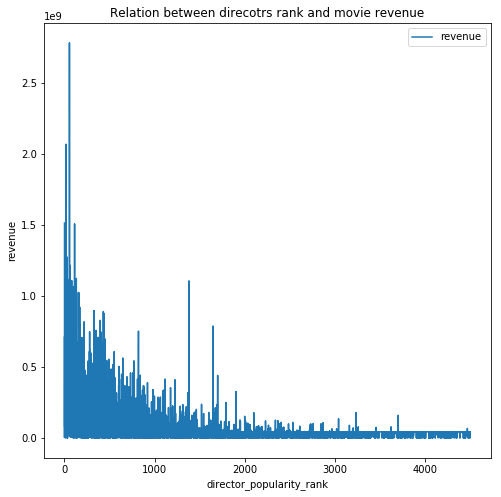

In [46]:

new_df.plot(x = 'director_popularity_rank' , y ='revenue',figsize = (8,8))
labeling('Relation between direcotrs rank and movie revenue','director_popularity_rank','revenue')

**As we can see it's very obvious that the higher the popularity the higher the revenue.**
<br>
note: 1 means highest popularity rank

### Research Question 3  (what is the correlation between budget and revenue?)

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.plot(x = 'budget' , y = 'revenue' ,kind = 'scatter')
labeling('budget,revenue relation','budget','revenue')

We can see it's positive correlation which means the movies with higher budgets are most likely to get more revenue.

<a id='conclusions'></a>
## Conclusions
### Results:
according to our data:
- We figured out that there are particluar directors that their movies always get high popularity and then we found out that those directors movies gets very high revenue as shown in the visualization above.
- Also we found that the higher the budget of the movie the higher its revenue will be.

### Limitations:
- In some columns like (budget - revenue) we have alot of missing values which are represented by zeros .
- I solved this issue by filling the missing values with mean value 
- a better solution was by analyzing the other columns first and based on some rank we will give for movies , movies with higher rank will get high value for(budget - revenue) instead of the mean and vice cersa

## Submitting your Project 



In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0